In [304]:
import pandas as pd
from faker import Faker
import random as rnd
from typing import *
import matplotlib.pyplot as plt
import numpy as np

We generated our data based on real 2022 university statistics, which we found through the sources listed at the bottom of this cell. We replicated the university application process from the perspective of several Universities, but focusing primarily on the University of Colorado - Boulder. The statistics we found told us exactly how many students applied during the 2022 school year, what percentage of those students were accepted, and what percentage ended up enrolling. We were also able to figure out the average GPA, SAT Score, and ACT Score for each of these applicants. This coupled with the percentage of students at each college within CU Boulder, the percent of instate / out of state residents, and the tuition paid by each combination of these individuals allowed us to calculate the total budget CU Boulder has to work with. 

Based on the above information, we were able to generate highly accurate simulatory data that almost certainly replicates real life.

Overall, the business process we were able to identify exists as follows:
1. The school receives a large amount of applications, through which they must filter
2. Based on certain academic criteria, these students are either accepted or rejected
    (In our simulation this criteria is limited to SAT Score, ACT Score, and GPA)
3. The school then sends out admission acceptance letters to the qualifying students
4. Students respend whether they plan to enroll at that university
5. The students then have to select the college they plan to enroll in (Engineering, Music, Business)
6. Based on the college and their residency status, students are filtered into one of 12 payment tiers
7. Finally, based on the number of students enrolled and the payment tiers said students fall into, CU Boulder is able to predict the budget they have to work with for the following fiscal year


If this applicant has chosen the University of Colorado Boulder, they will then have the ability to see a cost breakdown of their tuition based on multiple factors. There is a breakdown of tuition based on geographical factors such as; resident (Colorado), non-resident (outside Colorado), or international. Of these three sections there are four tiers each containing different majors with different tuition costs and are broken down as such:

Tier 1: Arts & Humanities in Arts & Sciences, Education, Music, Open Option in Arts & Sciences, Program in Exploratory Studies, and Social Sciences in Arts & Sciences 
Tier 2: Environmental Design and Media, Communication and Information (CMCI)
Tier 3: Engineering and Natural Sciences in Arts & Sciences
Tier 4: Business  
These four tiers exist within each of the three different geographical tuition options and all contain different prices points listed as:  
Resident (per year)
Tier 1: $30,452
Tier 2: $32,228
Tier 3: $34,004
Tier 4: $35,924
Nonresident (per year)
Tier 1: $57,702
Tier 2: $59,500
Tier 3: $60,982
Tier 4: $61,306
International (per year)
Tier 1: $59,602
Tier 2: $61,296
Tier 3: $62,772
Tier 4: $63,202
This data is plucked from the University of Colorado Boulder and is replicated to create a mutually beneficial system for both the applicant and the university. Using this process allows the applicant to analyze and plan out if the University of Colorado Boulder is right for them by accessing their potential financial obligation. This also creates an effective budgeting plan for the university for the upcoming school year by quickly being able to recognize the money that will be flowing in from prospective students. 


Berkeley:
https://admission.universityofcalifornia.edu/campuses-majors/berkeley/freshman-admission-profile.html

Boulder:
https://public.tableau.com/app/profile/university.of.colorado.boulder.ir/viz/QualComp/AdmissionsCounts
https://www.colorado.edu/oda/institutional-research/our-students/financial-aid
https://www.colorado.edu/bursar/undergraduate-costs-by-tier
https://www.colorado.edu/oda/sites/default/files/attached-files/overallprofilefall22.pdf
https://www.colorado.edu/oda/sites/default/files/attached-files/firstyearprofilefall22.pdf



DeVry:
https://www.devry.edu/admissions/undergraduate-admissions.html#:~:text=Although%20requirements%20may%20vary%20by,of%20the%20other%20ways%20listed.

Harvard:
https://www.collegetransitions.com/blog/how-to-get-into-harvard/

In [305]:
# Integrate if time
def importExcel() -> Tuple[pd.DataFrame]: 
    collegeAdmissionsDf = pd.read_excel("CollegeAdmissionsData.xlsx")
    collegeAdmissionsDf = collegeAdmissionsDf.rename(columns={"Unnamed: 0": "College"})

    boulderTuitionCostDf = pd.read_excel("BoulderTuitionCost.xlsx")
    return((collegeAdmissionsDf, boulderTuitionCostDf))
importExcel()[0]

,College,SAT Total,SAT Math,SAT EBRW,ACT Total,GPA
0,DeVry,920,460,460,17.0,2.00
1,University of Colorado - Boulder,1289,644,645,29.2,3.68
2,Berkeley,1440,735,705,32.5,3.89
3,Harvard,1515,775,740,34.0,4.18


In [306]:
class Student:
    def __init__(self, studentFirstName, studentLastName, sTotal, actTotal, gradePointAverage, admissionType, schoolType):
        self.studentFirstName = studentFirstName
        self.studentLastName = studentLastName
        self.sTotal = sTotal
        self.actTotal = actTotal
        self.gradePointAverage = gradePointAverage
        self.admissionType = admissionType
        self.schoolType = schoolType

In [307]:
def scoreGeneratorHelper() -> Tuple[float, float, float]: #randomly generates SAT, ACT, and GPAs for students
    scoreList = []
    randomNumber = rnd.uniform(.9,1)
    if (randomNumber > .97 and (rnd.uniform(0,1) > .75)):
        newRandomNumber = 1.05
        totalSatScore = round(randomNumber * 1600)
        totalActScore = round(randomNumber * 36)
        totalGpa = round(newRandomNumber * 4.0,2)
        scoreList.append((totalSatScore, totalActScore, totalGpa))
    elif (randomNumber > .9725 and (rnd.uniform(0,1) > .5)):
        newRandomNumber = .965
        totalSatScore = round(newRandomNumber * 1600)
        totalActScore = round(newRandomNumber * 36)
        totalGpa = round(newRandomNumber * 4.0,2)
        scoreList.append((totalSatScore, totalActScore, totalGpa))
    else:
        totalSatScore = round(randomNumber * 1600)
        totalActScore = round(randomNumber * 36)
        totalGpa = round(randomNumber * 4.0,2)
#         if ((totalSatScore+75) < 1600):
#             totalSatScore += 75
#             scoreList.append((totalSatScore, totalActScore, totalGpa))
#             return scoreList
        scoreList.append((totalSatScore, totalActScore, totalGpa))
    return scoreList

In [308]:
def admissionTypeHelper() -> str: #determines the residential status of each student based on statistical data
    randomNumber = rnd.uniform(0, 1)
    if(randomNumber > .5):
        admissionType = "In State"
        return admissionType
    elif(randomNumber > .02):
        admissionType = "Out of State"
        return admissionType
    else:
        admissionType = "International"
        return admissionType

In [309]:
def schoolTypeHelper() -> str: #determines what school each student will go to based on statistical data
    randomNumber = rnd.uniform(0,1)
    if randomNumber > .571:
        schoolType = "Arts and Sciences"
        return schoolType
    elif randomNumber > .341:
        schoolType = "Engineering"
        return schoolType
    elif randomNumber > .218:
        schoolType = "Business"
        return schoolType
    elif randomNumber > 129:
        schoolType = "Exploratory Studies"
        return schoolType
    elif randomNumber > 63:
        schoolType = "Media, Communication, and Information"
        return schoolType
    elif randomNumber > 46:
        schoolType = "Environmental Design"
        return schoolType
    elif randomNumber > 33:
        schoolType = "Education"
        return schoolType
    elif randomNumber > 18:
        schoolType = "Law"
        return schoolType
    elif randomNumber > 5:
        schoolType = "Music"
        return schoolType
    else:
        schoolType = "Multi-Disciplinary"
        return schoolType

In [310]:
def createApplicantList() -> List[Student]:
    studentList = [] # Initializes an empty list of student objects
    fake = Faker() # Creates a faker object used for creation of names
    for i in range(0,54858): 
        fakeFirstName = fake.first_name() #fake first name
        fakeLastName = fake.last_name() #fake last name
        scoreList = scoreGeneratorHelper() #calls the score generator helper function to generate SAT, ACT, and GPA score for students
        admissionType = admissionTypeHelper() #calls the admission type helper function to determine student admission type based on statistical data
        schoolType = schoolTypeHelper() #calls the school type helper function to determine student college of choice based on statistical data
        studentObject = Student(fakeFirstName, fakeLastName, scoreList[0][0], scoreList[0][1], scoreList[0][2], admissionType, schoolType)
        #creates the student object
        studentList.append(studentObject) #appends student object to a list and returns it
    return(studentList)

In [311]:
def devryAdmissionGraderHelper(row, dataDataFrame): #helps calculate whether a student would get into DeVry university based on statistical data
    if row["SAT Total"] > dataDataFrame["SAT Total"].iloc[0]: #compares student SAT with DeVry minimum SAT
        if row["GPA"] > dataDataFrame["GPA"].iloc[0]: #compares student GPA with DeVry minimum GPA
            return True #returns true if student is accepted
    if row["ACT Total"] > dataDataFrame["ACT Total"].iloc[0]: #compares student ACT with DeVry minimum ACT
        if row["GPA"] > dataDataFrame["GPA"].iloc[0]:#compares student GPA with DeVry minimum GPA
            return True #returns true if student is accepted
    return False

# Only the SAT or the ACT have to be high enough to grant admission. They do not both have to meet the threshold

In [312]:
def boulderAdmissionGraderHelper(row, dataDataFrame): #SAME
    if row["SAT Total"] > dataDataFrame["SAT Total"].iloc[1]:
        if row["GPA"] > dataDataFrame["GPA"].iloc[1]:
            return True
    if row["ACT Total"] > dataDataFrame["ACT Total"].iloc[1]:
        if row["GPA"] > dataDataFrame["GPA"].iloc[1]:
            return True
    return False

In [313]:
def berkeleyAdmissionGraderHelper(row, dataDataFrame): #SAME
    if row["SAT Total"] > dataDataFrame["SAT Total"].iloc[2]:
        if row["GPA"] > dataDataFrame["GPA"].iloc[2]:
            return True
    if row["ACT Total"] > dataDataFrame["ACT Total"].iloc[2]:
        if row["GPA"] > dataDataFrame["GPA"].iloc[2]:
            return True
    return False

In [314]:
def harvardAdmissionGraderHelper(row, dataDataFrame): #SAME
    if row["SAT Total"] > dataDataFrame["SAT Total"].iloc[3]:
        if row["GPA"] > dataDataFrame["GPA"].iloc[3]:
            return True
    if row["ACT Total"] > dataDataFrame["ACT Total"].iloc[3]:
        if row["GPA"] > dataDataFrame["GPA"].iloc[3]:
            return True
    return False

In [315]:
def admissionGrader(inputStudentList, dataDataFrame) -> pd.DataFrame: 
    studentList = [] #empty student list
    for student in inputStudentList: #goes through the previous generated list of student objects and appends relevant student information to new student list
        studentList.append({"FirstName": student.studentFirstName, "LastName": student.studentLastName, "SAT Total": student.sTotal, "ACT Total": student.actTotal, "GPA": student.gradePointAverage})
    studentDf = pd.DataFrame(studentList) #creates df from above list
    studentDf["DeVry Admission"] = studentDf.apply(lambda row: devryAdmissionGraderHelper(row, dataDataFrame), axis=1) #calls the above functions to generate a new column based on whether a student was admitted or not
    studentDf["Boulder Admission"] = studentDf.apply(lambda row: boulderAdmissionGraderHelper(row, dataDataFrame), axis=1)
    studentDf["Berkeley Admission"] = studentDf.apply(lambda row: berkeleyAdmissionGraderHelper(row, dataDataFrame), axis=1)
    studentDf["Harvard Admission"] = studentDf.apply(lambda row: harvardAdmissionGraderHelper(row, dataDataFrame), axis=1)

    return(studentDf) #returns a student DF

In [316]:
def boulderAdmitted(inputStudentDf, inputStudentList) -> pd.DataFrame:
    studentList = []
    for student in inputStudentList:
        studentList.append({"FirstName": student.studentFirstName, "LastName": student.studentLastName, "Admission Type": student.admissionType, "School Type": student.schoolType})
    boulderStudentDf = pd.DataFrame(studentList)
    inputStudentDf = inputStudentDf[inputStudentDf["Boulder Admission"] == True]
    mergedDf = pd.merge(inputStudentDf[["Boulder Admission", "FirstName", "LastName"]], boulderStudentDf, on=["FirstName","LastName"], how="inner")
    mergedDf = mergedDf[mergedDf["Boulder Admission"] == True]
    return mergedDf

In [317]:
# def schoolToTierHelper(row):
#     inputSchoolType = row["School Type"]
    
#     match inputSchoolType:
        
#         case "Arts and Sciences":
#             return "Tier 1"
#         case "Engineering":
#             return "Tier 3"
#         case "Business":
#             return "Tier 4"
#         case "Exploratory Studies":
#             return "Tier 1"
#         case "Media, Communication, and Information":
#             return "Tier 2"
#         case "Environmental Design":
#             return "Tier 2"
#         case "Education":
#             return "Tier 1"
#         case "Law":
#             return "Tier 3"
#         case "Music":
#             return "Tier 1"
#         case "Multi-Disciplinary":
#             return "Tier 3"        

# Appears that my version of python does not support match statements. Had to switch to if / elif / else instead

In [318]:
def schoolToTierHelper(row):
    inputSchoolType = row["School Type"]
    
    if inputSchoolType == "Arts and Sciences":
        return "Tier 1"
    elif inputSchoolType == "Engineering":
        return "Tier 3"
    elif inputSchoolType == "Business":
        return "Tier 4"
    elif inputSchoolType == "Exploratory Studies":
        return "Tier 1"
    elif inputSchoolType == "Media, Communication, and Information":
        return "Tier 2"
    elif inputSchoolType == "Environmental Design":
        return "Tier 2"
    elif inputSchoolType == "Education":
        return "Tier 1"
    elif inputSchoolType == "Law":
        return "Tier 3"
    elif inputSchoolType == "Music":
        return "Tier 1"
    elif inputSchoolType == "Multi-Disciplinary":
        return "Tier 3"

In [319]:
def tuitionCalculatorHelper(row, tuitionCostDf):
    admission_type = row["Admission Type"]
    tier = row["Tier"]
    if admission_type == "In State":
        if tier == "Tier 1":
            return tuitionCostDf["Tier One"].iloc[0]
        elif tier == "Tier 2":
            return tuitionCostDf["Tier Two"].iloc[0]
        elif tier == "Tier 3":
            return tuitionCostDf["Tier Three"].iloc[0]
        elif tier == "Tier 4":
            return tuitionCostDf["Tier Four"].iloc[0]
    elif admission_type == "Out of State":
        if tier == "Tier 1":
            return tuitionCostDf["Tier One"].iloc[1]
        elif tier == "Tier 2":
            return tuitionCostDf["Tier Two"].iloc[1]
        elif tier == "Tier 3":
            return tuitionCostDf["Tier Three"].iloc[1]
        elif tier == "Tier 4":
            return tuitionCostDf["Tier Four"].iloc[1]
    elif admission_type == "International":
        if tier == "Tier 1":
            return tuitionCostDf["Tier One"].iloc[2]
        elif tier == "Tier 2":
            return tuitionCostDf["Tier Two"].iloc[2]
        elif tier == "Tier 3":
            return tuitionCostDf["Tier Three"].iloc[2]
        elif tier == "Tier 4":
            return tuitionCostDf["Tier Four"].iloc[2]

In [320]:
def totalBudgetCalculator(boulderDataFrame, tuitionCostDf) -> Tuple[pd.DataFrame, int]:
    boulderDataFrame = boulderDataFrame.sample(7106, random_state=42)
    boulderDataFrame["Tier"] = boulderDataFrame.apply(schoolToTierHelper, axis=1)
    boulderDataFrame["Cost"] = boulderDataFrame.apply(lambda row: tuitionCalculatorHelper(row, tuitionCostDf), axis=1)
    return ((boulderDataFrame, boulderDataFrame["Cost"].sum()))

In [321]:
    #MAIN FUNCTION CELL
    ---------------------------------------------------------------------------------------------------------------
    
    dataDataFrameList = importExcel() #The dataDataFrameList consists of two imported excel files. The first which contains
    #minimum scores for college entry. The second which contains the four price tiers for CU Students
    
    studentList = createApplicantList() #The Student List consists of student objects. These simulate the students applying.
#     print(studentList)
    
    studentDataFrame = admissionGrader(studentList, dataDataFrameList[0]) #The studentDataFrame is a DF that lists all
    #students and their college admissions decision for 4 colleges
#     print(studentDataFrame)

    boulderDataFrame = boulderAdmitted(studentDataFrame, studentList) #The boulderDataFrame consists of students that have
    #been admitted to boulder and includes their school of choice and residential status
#     print(boulderDataFrame)

    budgetUnpack = totalBudgetCalculator(boulderDataFrame, dataDataFrameList[1]) #The budgetUnpack variable consists of two
    #elements. The first being an updated BDF which includes tier and cost columns. The second being a total budget int.
#     print(budgetUnpack[0])

      FirstName LastName  SAT Total  ACT Total   GPA  DeVry Admission  \
0       Michael  Barrera       1489         34  3.72             True   
1        Ashley    Patel       1460         33  3.65             True   
2           Joy   Gibson       1525         34  3.81             True   
3       Allison  Osborne       1532         34  3.83             True   
4        Rachel   Taylor       1484         33  3.71             True   
...         ...      ...        ...        ...   ...              ...   
54853      Lori   Rivera       1529         34  3.82             True   
54854   Cynthia    Scott       1538         35  3.85             True   
54855     David     Shah       1518         34  3.79             True   
54856    Howard     Love       1517         34  3.79             True   
54857     Helen    Jones       1489         33  3.72             True   

       Boulder Admission  Berkeley Admission  Harvard Admission  
0                   True               False             

Many of the above print statements have been disabled, but you can treat the above cell as a main function of sorts. If you wish to test the code or print out any of the dataframes / lists created, it would be easiest to do so from the cell above.

In [322]:
print(budgetUnpack[1])

164724992


The above print statement generates the total budget of CU Boulder for the first semester of 2022. However, by extrapolating based on past trends, this same model can be applied to predict future budgets, which could greatly help with the fiscal planning undergone by the University of Colorado - Boulder.

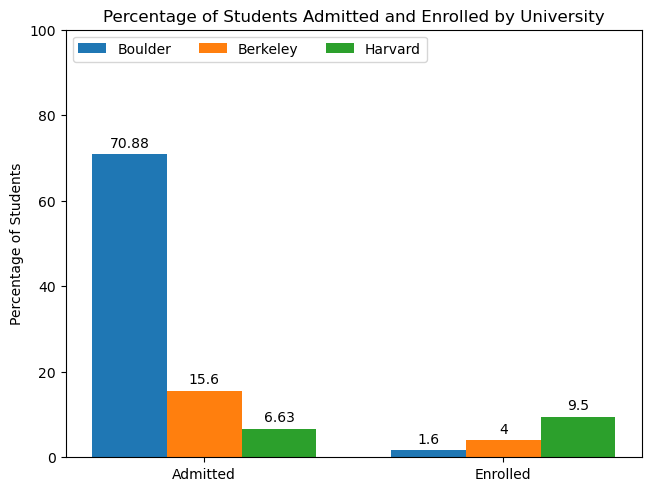

In [323]:
def collegeAdmissionsGraphCreator(studentDataFrame):
    admissionStatus = ("Admitted", "Enrolled")
    admissionMeans = {
        "Boulder": [round(studentDataFrame[studentDataFrame["Boulder Admission"] == True].size / 54858 * 10, 2), round((studentDataFrame[studentDataFrame["Boulder Admission"] == True].size * .16 / studentDataFrame[studentDataFrame["Boulder Admission"] == True].size * 10), 2)],
        "Berkeley": [round(studentDataFrame[studentDataFrame["Berkeley Admission"] == True].size / 54858 * 10, 2), round((studentDataFrame[studentDataFrame["Berkeley Admission"] == True].size * .40 / studentDataFrame[studentDataFrame["Berkeley Admission"] == True].size * 10), 2)],
        "Harvard": [round(studentDataFrame[studentDataFrame["Harvard Admission"] == True].size / 54858 * 10, 2), round((studentDataFrame[studentDataFrame["Harvard Admission"] == True].size * .95 / studentDataFrame[studentDataFrame["Harvard Admission"] == True].size * 10), 2)],
    }
    
    x = np.arange(len(admissionStatus))
    width = 0.25
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in admissionMeans.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    ax.set_ylabel('Percentage of Students')
    ax.set_title('Percentage of Students Admitted and Enrolled by University')
    ax.set_xticks(x + width, admissionStatus)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, 100)

    plt.show()

collegeAdmissionsGraphCreator(studentDataFrame)

The above chart shows us the percentage of admitted and enrolled students by university. There is a clear trend of lower ranked / less prestigious universities admitting significantly more students while actually enrolling significantly less. 

We omitted the applied section because in our simulated data the number of applicants was the same for each university. 

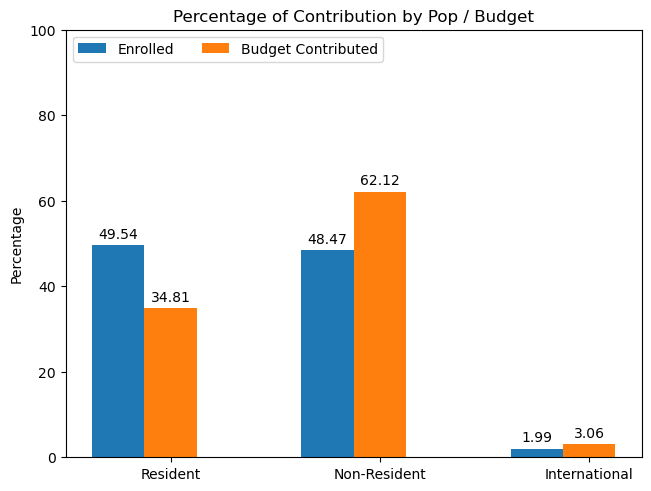

In [324]:
def budgetAnalysisGraphCreator(boulderDataFrame, costDf):
    residentDf = costDf[costDf["Admission Type"] == "In State"]
    nonresidentDf = costDf[costDf["Admission Type"] == "Out of State"]
    internationalDf = costDf[costDf["Admission Type"] == "International"]
    residentialStatus = ("Resident", "Non-Resident", "International")
    residentialMeans = {
        "Enrolled": [round(len(boulderDataFrame[boulderDataFrame["Admission Type"] == "In State"]) / len(boulderDataFrame) * 100,2), round(len(boulderDataFrame[boulderDataFrame["Admission Type"] == "Out of State"]) / len(boulderDataFrame) * 100,2), round(len(boulderDataFrame[boulderDataFrame["Admission Type"] == "International"]) / len(boulderDataFrame) * 100,2)],
        "Budget Contributed": [round(residentDf["Cost"].sum() / costDf["Cost"].sum() * 100, 2), round(nonresidentDf["Cost"].sum() / costDf["Cost"].sum() * 100, 2), round(internationalDf["Cost"].sum() / costDf["Cost"].sum() * 100, 2)]
    }
    
    x = np.arange(len(residentialStatus))
    width = 0.25
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in residentialMeans.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    ax.set_ylabel('Percentage')
    ax.set_title('Percentage of Contribution by Pop / Budget')
    ax.set_xticks(x + width, residentialStatus)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, 100)

    plt.show()

budgetAnalysisGraphCreator(boulderDataFrame, budgetUnpack[0])

The above chart shows us the contribution of each admitted group (residents, non-residents, and international students) both in terms of overall population and in terms of their contribution to the budget. The graph clearly indicates that although Colorado residents make up more than half of all admitted students, their financial contribution is equal to about a third. Meanwhile, non-residents of Colorado make up less than half of the admitted students but their financial contribution is equal to almost two thirds.

Our model can help us reach a number of new conclusions regarding the University of Colorado - Boulder. 
1. It can easily allow us to calculate the average GPA, average SAT score, and average ACT score of each student at CU Boulder and compare it to 3 universities across the country
2. It can show us the differences in amount paid by students of various colleges at CU Boulder, as shown by the tier system
3. It can help us forecast future university spending and earning, which can help us create a budget and accomplish financial goals